In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('perrin-freres-monthly-champagne.csv')

In [3]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
#Cleaning the data
data.columns=['Month','Sales']
data.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
#Removing last 2 rows
data.drop(106,axis=0,inplace=True)
data.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [7]:
data.drop(105,axis=0,inplace=True)
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [8]:
data.isna().sum()

Month    0
Sales    0
dtype: int64

In [9]:
data.dtypes

Month     object
Sales    float64
dtype: object

In [10]:
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [11]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Data Visualization

<AxesSubplot:>

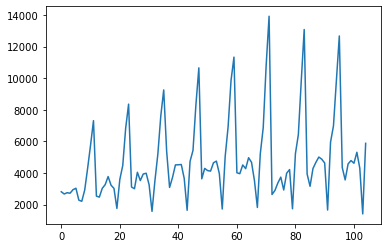

In [12]:
data['Sales'].plot()

In [13]:
#test for stationarity
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(data['Sales'])

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.8335930563276226
p-value : 0.3639157716602452
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [17]:
data['Sales First Difference'] = data['Sales'] - data['Sales'].shift(1)

In [18]:
data['Sales'].shift(1)

0         NaN
1      2815.0
2      2672.0
3      2755.0
4      2721.0
        ...  
100    4788.0
101    4618.0
102    5312.0
103    4298.0
104    1413.0
Name: Sales, Length: 105, dtype: float64

In [19]:
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(12) #Cause the sales season is of 12 months

In [20]:
data.head(20)

,Month,Sales,Sales First Difference,Seasonal First Difference
0,1964-01-01,2815.0,NaN,NaN
1,1964-02-01,2672.0,-143.0,NaN
2,1964-03-01,2755.0,83.0,NaN
3,1964-04-01,2721.0,-34.0,NaN
4,1964-05-01,2946.0,225.0,NaN
5,1964-06-01,3036.0,90.0,NaN
6,1964-07-01,2282.0,-754.0,NaN
7,1964-08-01,2212.0,-70.0,NaN
8,1964-09-01,2922.0,710.0,NaN
9,1964-10-01,4301.0,1379.0,NaN


In [21]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

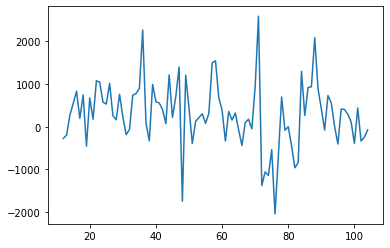

In [22]:
data['Seasonal First Difference'].plot()

## Auto Regressive Model


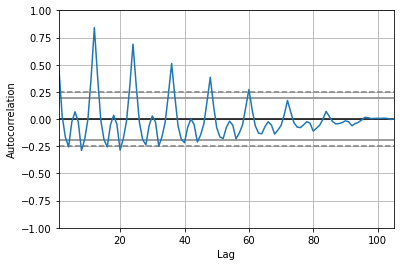

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales'])
plt.show()

## Final Thoughts on Autocorrelation and Partial Autocorrelation
- Identification of an AR model is often best done with the PACF.

> - For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

- Identification of an MA model is often best done with the ACF rather than the PACF.

> - For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

In [24]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

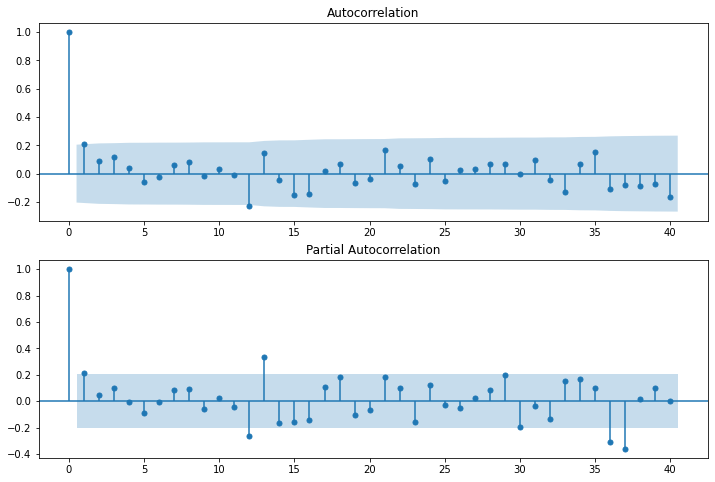

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [26]:
#For seasonal data
#p=1, d=1, q=0 or 1
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:>

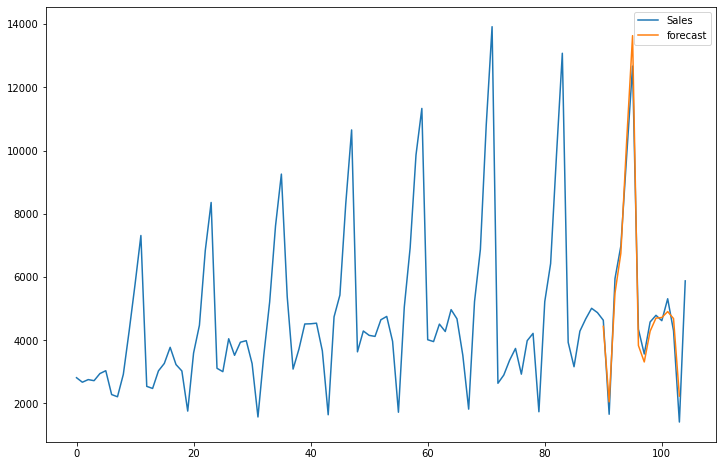

In [27]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))